In [2]:
# 구글드라이브 마운틴 먼저

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

bicycle = pd.read_csv('/content/drive/MyDrive/data/bicycle.csv')
bicycle

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [3]:
#열 인덱스 수정하기

bicycle.columns = ['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity', 'visibility', 'ozone',  'pm10', 'pm2.5', 'count']
bicycle.columns

bicycle.head()

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


*    id : 고유 id
*    hour : 시간
*    temperature  : 기온
*    precipitation  : 비가 오지 않았으면 0, 비가 오면 1
*    windspeed  : 풍속(평균)
*    humidity  : 습도
*    visibility  : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
*    ozone  : 오존
*    pm10  : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
*    pm2.5  : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
*    count  : 시간에 따른 따릉이 대여 수

In [4]:
bicycle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1459 non-null   int64  
 1   hour           1459 non-null   int64  
 2   temperature    1457 non-null   float64
 3   precipitation  1457 non-null   float64
 4   windspeed      1450 non-null   float64
 5   humidity       1457 non-null   float64
 6   visibility     1457 non-null   float64
 7   ozone          1383 non-null   float64
 8   pm10           1369 non-null   float64
 9   pm2.5          1342 non-null   float64
 10  count          1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:

bicycle.isnull().sum()  #1459개의 데이터 중 누락값이 117이 최대('pm2.5'열 삭제 안함) 


id                 0
hour               0
temperature        2
precipitation      2
windspeed          9
humidity           2
visibility         2
ozone             76
pm10              90
pm2.5            117
count              0
dtype: int64

In [6]:
bicycle = bicycle.dropna(axis=0)    # 누락 데이터 포함한 행 삭제
bicycle.info()                      #원본데이터 1459 개 ==> 삭제 후 1328개 남음
print(bicycle.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1328 non-null   int64  
 1   hour           1328 non-null   int64  
 2   temperature    1328 non-null   float64
 3   precipitation  1328 non-null   float64
 4   windspeed      1328 non-null   float64
 5   humidity       1328 non-null   float64
 6   visibility     1328 non-null   float64
 7   ozone          1328 non-null   float64
 8   pm10           1328 non-null   float64
 9   pm2.5          1328 non-null   float64
 10  count          1328 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 124.5 KB
id               0
hour             0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
count            0
dtype: int64


In [ ]:
#온도 데이터 구간을 나누기 위해 확인
bicycle['temperature'].describe()

count    1328.000000
mean       16.866039
std         5.196544
min         3.100000
25%        13.000000
50%        16.800000
75%        20.200000
max        30.000000
Name: temperature, dtype: float64

In [7]:
# 동일 구간으로 나누기 위해
#describe()에서 찾은 최소, 25%, 50%, 75%, max를 경계로 설정
bin_divider = [ 3.1, 13, 16.8, 20,  30]
bin_name = ['쌀쌀해','적당해', '딱좋아', '더울걸']

bicycle['cut_temperature'] = pd.cut( bicycle['temperature'],bins = bin_divider ,labels=bin_name , include_lowest = True)

bicycle[['temperature', 'cut_temperature']]

bicycle['cut_temperature'].value_counts()

<ipython-input-7-06bc8dd8b1f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicycle['cut_temperature'] = pd.cut( bicycle['temperature'],bins = bin_divider ,labels=bin_name , include_lowest = True)


더울걸    343
적당해    340
쌀쌀해    334
딱좋아    311
Name: cut_temperature, dtype: int64

In [ ]:
qcut_bycle =  pd.qcut( bicycle['temperature'],4)   
qcut_bycle

#qcut은 표본 변위치를 기반으로 데이터를 나눠준다 cut을 이용했을 때 데이터의 분산에 따라 각각의 그룹마다 데이터의 개수가 다르게 나눠지는 경우가 많은데 qcut은 표준 위치를 사용하므로 적당히 같은 크기의 그룹으로 나눌 수 있음
#(13.0, 16.8]  (괄호 쪽의 값은 포함하지 않고, ]괄호 쪽에 값은 포함하는 간격을 나타냄

0        (12.8, 16.6]
1        (16.6, 20.1]
2        (12.8, 16.6]
3       (3.099, 12.8]
4        (20.1, 30.0]
            ...      
1454     (16.6, 20.1]
1455    (3.099, 12.8]
1456     (16.6, 20.1]
1457     (20.1, 30.0]
1458     (20.1, 30.0]
Name: temperature, Length: 1459, dtype: category
Categories (4, interval[float64, right]): [(3.099, 12.8] < (12.8, 16.6] < (16.6, 20.1] <
                                           (20.1, 30.0]]

In [ ]:
cut_bycle =  pd.cut( bicycle['temperature'],4)   
cut_bycle


0        (9.825, 16.55]
1       (16.55, 23.275]
2        (9.825, 16.55]
3        (3.073, 9.825]
4        (23.275, 30.0]
             ...       
1454    (16.55, 23.275]
1455     (9.825, 16.55]
1456    (16.55, 23.275]
1457    (16.55, 23.275]
1458    (16.55, 23.275]
Name: temperature, Length: 1328, dtype: category
Categories (4, interval[float64, right]): [(3.073, 9.825] < (9.825, 16.55] < (16.55, 23.275] <
                                           (23.275, 30.0]]

In [ ]:
bicycle.corr(method='pearson')   # bicycle.corr() 도 가능

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


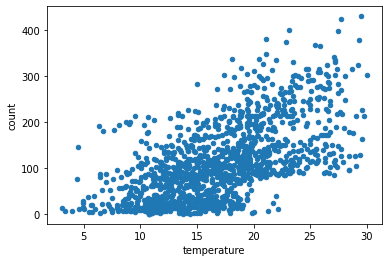

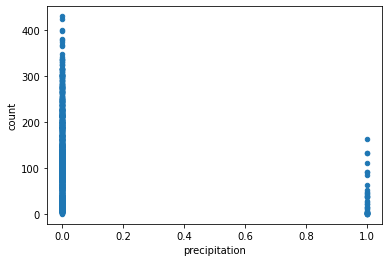

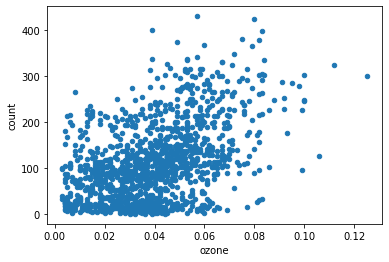

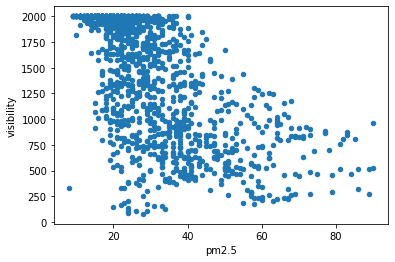

In [ ]:
bicycle.plot(x='temperature', y='count', kind='scatter') 
bicycle.plot(x='precipitation', y='count', kind='scatter') 
bicycle.plot(x='ozone', y='count', kind='scatter') 
bicycle.plot(x='pm2.5', y='visibility', kind='scatter') 

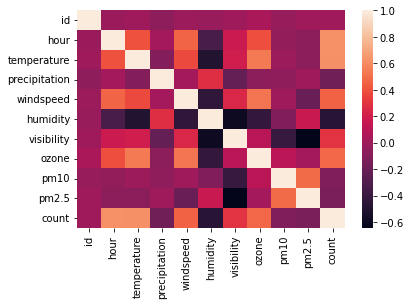

In [ ]:
sns.heatmap(data=bicycle.corr() )   #, annot =True, 회색조로 바꾸려면 cmap='binary',
plt.show()



*   cbar=True, #오른쪽 컬러 막대 출력 여부
*   annot=True, #셀에 숫자를 보여줄 것인지 여부
*   square=True, #차트를 정사각형으로 할 것인지
*   fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
*   annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
*   yticklabels=column_names, #y축에 컬럼명 출력
*   xticklabels=column_names) #x축에 컬럼명 출력
*   inewidths = 셀 사이 선 굵기, 
*   vmax = 최대값, 
*   cmap = 색상,



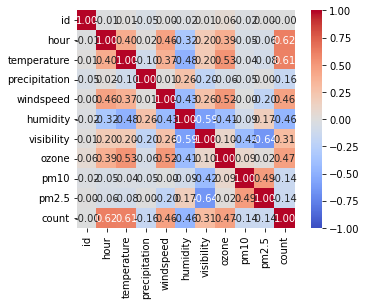

In [ ]:
sns.heatmap(data=bicycle.corr(), annot =True ,square=True, fmt='.2f', vmin=-1, cmap='coolwarm')   #, annot =True, 회색조로 바꾸려면 cmap='binary',
#plt.show()

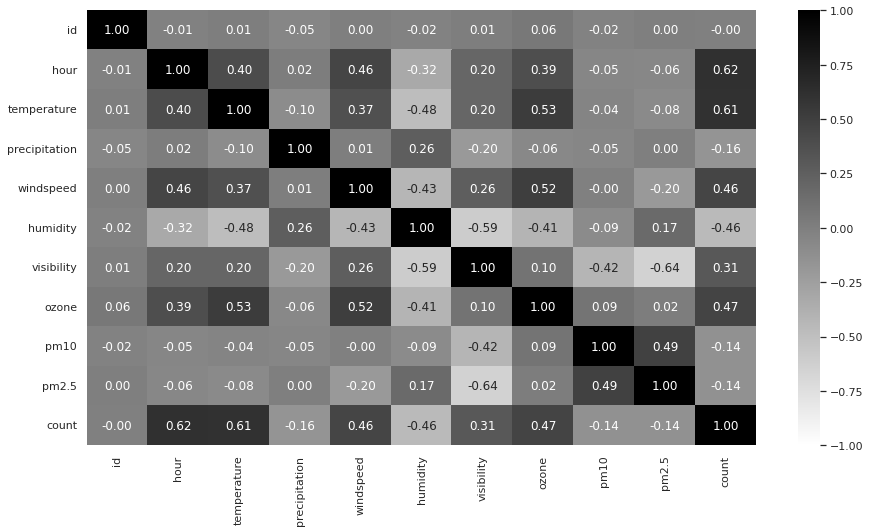

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(bicycle.corr(), annot =True , fmt='.2f', vmin=-1, cmap='binary')   #회색조로 바꾸려면  
#plt.show()

In [ ]:
bicycle['count'].corr(bicycle['temperature'],  method='pearson')#0.6194038048475294

0.6194038048475294

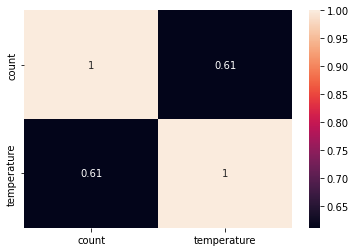

In [ ]:
sns.heatmap(data=bicycle[['count','temperature']].corr(), annot =True )
plt.show()